In [2]:
# STEP 1.1

from urllib.request import urlopen
txt = urlopen("https://raw.githubusercontent.com/crash-course-ai/lab2-nlp/master/vlogbrothers.txt").read().decode('ascii').split("\n")
print("Our dataset contains {} vlogbrothers scripts".format(len(txt)))
# ADVANCED_CHANGEME -- You can change this to load any text file
# You want it to be one line of plain text for every script.  Extra
# annotations like [John:] or *starts coughing* make learning more difficult.
everything = set([w for s in txt for w in s.split()])
print("and {} lexical types".format(len(everything)))

Our dataset contains 626 vlogbrothers scripts
and 31924 lexical types


In [3]:
# STEP 1.2

# 1. Import the tokenizer
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser","tagger","ner","textcat"])

# 2. Tokenize
txt = [nlp(s) for s in txt]

# 3. Mark the beginning and end of each script
txt = [ ["<s>"] + [str(w) for w in s] + ["</s>"] for s in txt]

# 4. Separate the data into training and validation
train = txt[:-5]
valid = txt[-5:]

# 5. Flatten the lists into one long string and remove extra whitespace
train = [w for s in train for w in s if not w.isspace()]
valid = [w for s in valid for w in s if not w.isspace()]

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [4]:
# STEP 1.3

"""
    How big is our dataset?
"""
print("Our training dataset contains {} lexical types".format(len(set(train))))
print("Our training dataset contains {} lexical tokens".format(len(train)))

Our training dataset contains 22897 lexical types
Our training dataset contains 569698 lexical tokens


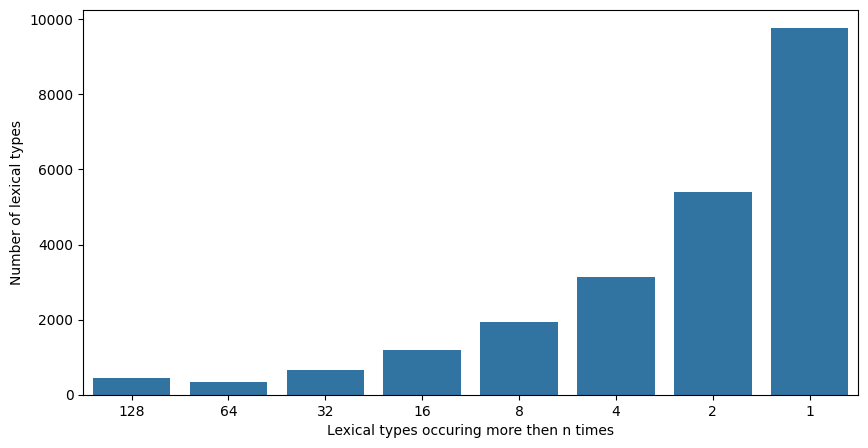

In [5]:
# STEP 1.4

# 1. Count the frequencies of every word
from collections import Counter, defaultdict
counts = Counter(train)

frequencies = [0]*8
for w in counts:
  if counts[w] >= 128:
    frequencies[0] += 1
  elif counts[w] >= 64:
    frequencies[1] += 1
  elif counts[w] >= 32:
    frequencies[2] += 1
  elif counts[w] >= 16:
    frequencies[3] += 1
  elif counts[w] >= 8:
    frequencies[4] += 1
  elif counts[w] >= 4:
    frequencies[5] += 1
  elif counts[w] >= 2:
    frequencies[6] += 1
  else:
    frequencies[7] += 1


# 2. Plot their distributions
import matplotlib.pyplot as plt
import seaborn as sns

f,a = plt.subplots(1,1,figsize=(10,5))
a.set(xlabel='Lexical types occuring more then n times',
      ylabel='Number of lexical types')

labels = [128, 64, 32, 16, 8, 4, 2, 1]
_ = sns.barplot(x=labels, y=frequencies, ax=a, order=labels)

In [6]:
# STEP 1.5

from textwrap import wrap
rare = [w for w in counts if counts[w] == 1]
for line in wrap("   ".join(["{:15s}".format(w) for w in rare[:100]]), width=70):
  print(line)

Pisgah            recycle           Inconvenient      sorta
ignored           Sheets            Toilet            Situation
oghomamamam       Oomph             Drinking          grizzly
malt              minty             alcoholy          tast-
achoo             Babysitter        Brave             Eden
Biblical          exalted           Eggers            Gourevitch
Thur-             patriarchal       Caravans          BP
58                Sixteen           condense          12:15
Misprinted        floss             terse             Punishment
Continuum         Apocalypticism    Emmitt            styrofoam
locations         Dances            Boxing            Federation
Upper             Poops             Poop              Kirsten
Dunst             Umbros            UEFA              Gunter
nonfictionaly     nonfictional      Roker             Ilyich
Linden            bullshit          Monty             Python
Idle              Lilliputians      Naked             gaping
theorem      

In [7]:
# STEP 1.6

# This is a little function to help us clean up the data
# CHANGEME -- Introduce or remove rules
import re
def simplify(w):
    # Remove extra punctuation
    w = w.replace("-", "").replace("~","")

    # Replace numbers with # sign
    w = re.sub('\d', '#', w)

    # Change some endings
    if len(w) > 3 and w[-2:] in set(["ed", "er","ly"]):
        return [w[:-2], w[-2:]]
    elif len(w) > 4 and w[-3:] in set(["ing","'re"]):
        return [w[:-3], w[-3:]]
    return [w]

19958 lexical types
612671 lexical tokens


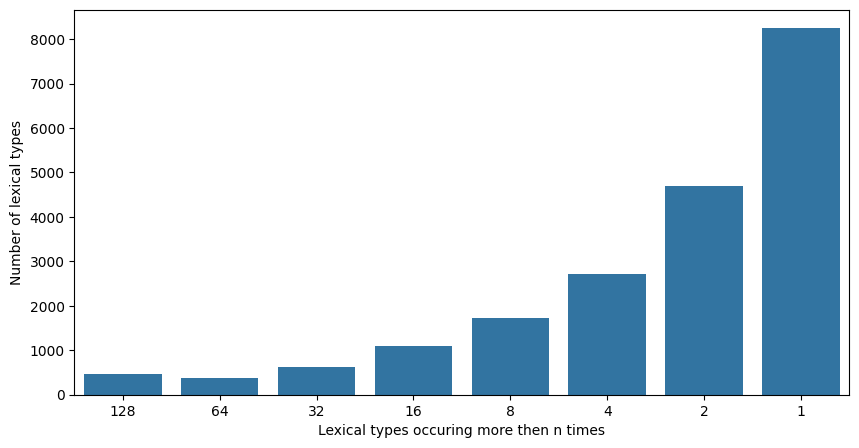

In [8]:
# STEP 1.7

# 1. Go through and clean all of our data
train_clean = []
for w in train:
    for piece in simplify(w):
        train_clean.append(piece)
valid_clean = []
for w in valid:
    for piece in simplify(w):
        valid_clean.append(piece)

"""
    How big is our dataset?
"""
print("{} lexical types".format(len(set(train_clean))))
print("{} lexical tokens".format(len(train_clean)))

"""
    What's our distribution look like?
"""
counts = Counter(train_clean)


frequencies = [0]*8
for w in counts:
  if counts[w] >= 128:
    frequencies[0] += 1
  elif counts[w] >= 64:
    frequencies[1] += 1
  elif counts[w] >= 32:
    frequencies[2] += 1
  elif counts[w] >= 16:
    frequencies[3] += 1
  elif counts[w] >= 8:
    frequencies[4] += 1
  elif counts[w] >= 4:
    frequencies[5] += 1
  elif counts[w] >= 2:
    frequencies[6] += 1
  else:
    frequencies[7] += 1


# 2. Plot their distributions
f,a = plt.subplots(1,1,figsize=(10,5))
a.set(xlabel='Lexical types occuring more then n times',
      ylabel='Number of lexical types')

labels = [128, 64, 32, 16, 8, 4, 2, 1]
_ = sns.barplot(x=labels, y=frequencies, ax=a, order=labels)

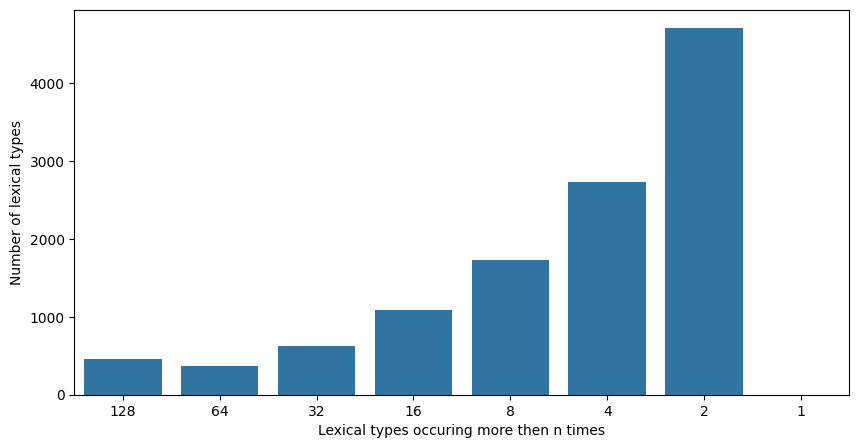

In [9]:
# STEP 1.8

counts_clean = Counter(train_clean)
train_unk = [w if counts_clean[w] > 1 else "unk" for w in train_clean]
valid_unk = [w if w in counts_clean and counts_clean[w] > 1 \
               else "unk" for w in valid_clean]

# Let's plot these one last time
counts = Counter(train_unk)

frequencies = [0]*8
for w in counts:
  if counts[w] >= 128:
    frequencies[0] += 1
  elif counts[w] >= 64:
    frequencies[1] += 1
  elif counts[w] >= 32:
    frequencies[2] += 1
  elif counts[w] >= 16:
    frequencies[3] += 1
  elif counts[w] >= 8:
    frequencies[4] += 1
  elif counts[w] >= 4:
    frequencies[5] += 1
  elif counts[w] >= 2:
    frequencies[6] += 1
  else:
    frequencies[7] += 1


# 2. Plot their distributions
f,a = plt.subplots(1,1,figsize=(10,5))
a.set(xlabel='Lexical types occuring more then n times',
      ylabel='Number of lexical types')

labels = [128, 64, 32, 16, 8, 4, 2, 1]
_ = sns.barplot(x=labels, y=frequencies, ax=a, order=labels)

In [10]:
# STEP 1.9

rare = [w for w in counts_clean if counts_clean[w] == 1]
rare.sort()
for line in wrap("   ".join(["{:15s}".format(w) for w in rare[-100:]]), width=70):
  print(line)

wheels            wheezywait        whereabouts       whereby
whilst            whim              whimp             whimper
whines            whippersnappers   whiskeys          whistle
whittl            wholesale         whoo              whoosey
whopp             wi                widest            widows
wields            wifi              wigg              wil
wildebeests       wilderness        wildflowers
willallpreordersofthefaultinourstarsbesign
willallpreordersofturtlesallthewaydownbesign   willful
willingness       willpow           wimp              wina
windowless        winds             winkel            winter
wipe              wipes             wires             wis
witch             withdrew          witnesses         witty
woahWOAHWOAH      wobb              wobby             womb
woodblock         woodcuts          woodpeck          wooooo
wordless          workedOn          workings          worldliness
wormhole          worms             worsens           worthwhil

In [11]:
# STEP 2.1

"""
  Prepare our datasets by converting words to numbers
"""
# Create a mapping from words <-> numbers
vocabulary = set(train_unk)
word_to_num = {}
num_to_word = {}
for num, word in enumerate(vocabulary):
  word_to_num[word] = num
  num_to_word[num] = word

# Convert our datasets into numbers
import torch
train = torch.LongTensor(len(train_unk))
for i in range(len(train_unk)):
  train[i] = word_to_num[train_unk[i]]

valid = torch.LongTensor(len(valid_unk))
for i in range(len(valid_unk)):
  valid[i] = word_to_num[valid_unk[i]]

In [12]:
# STEP 2.2

# Parameters
batch_size = 20
seq_len = 35        # CHANGEME

# Tell Torch to use a GPU for computation
device = torch.device("cuda")
# Setting the random seed decreases variability
# Remove next three lines if running on your laptop
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# citation: https://github.com/pytorch/examples/tree/master/word_language_model
def batchify(data, bsz):
    # Work out how cleanly we can divide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data.narrow(0, 0, nbatch * bsz)
    # Evenly divide the data across the bsz batches.
    data = data.view(bsz, -1).t().contiguous()
    return data.to(device)

def get_batch(source, i, seq_len):
    seq_len = min(seq_len, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].view(-1)
    return data, target

def repackage_hidden(h):
    """Wraps hidden states in new Tensors, to detach them from their history."""
    if isinstance(h, torch.Tensor):
        return h.detach()
    else:
        return tuple(repackage_hidden(v) for v in h)

train = batchify(train, batch_size)
valid = batchify(valid, batch_size)

In [13]:
# STEP 2.3

import torch.nn as nn

class EncoderDecoder(nn.Module):
  def __init__(self):
    """
        Define all the parameters of the model
    """
    super(EncoderDecoder, self).__init__()
    # How tightly should we compress our language represenations?
    self.embed_size = 300      # How big is our word vector   #ADVANCED_CHANGEME
    self.hidden_size = 600     # How big is our hidden space  #ADVANCED_CHANGEME

    """ Converting words to Vectors """
    # A lookup table for translating a word into a vector
    self.embedding = nn.Embedding(len(vocabulary), self.embed_size)
    # Initialize our word vectors with a random uniform distribution
    initrange = 0.1
    self.embedding.weight.data.uniform_(-initrange, initrange)


    """ An RNN (LSTM) with dropout """
    self.rnn = nn.LSTM(input_size=self.embed_size, hidden_size=self.hidden_size)
    self.shrink = nn.Linear(self.hidden_size, self.embed_size)
    self.drop = nn.Dropout(p=0.5)

    """ Predicting words from our model """
    # We convert our vector to a set of scores over words
    self.decode = nn.Linear(self.embed_size, self.embedding.weight.size(0))
    # We use the same matrix for this ``decoding'' that we used for ``encoding''
    # https://arxiv.org/abs/1608.05859
    self.decode.weight = self.embedding.weight
    self.decode.bias.data.zero_()


  def forward(self, input, hidden=None):
    """
        Run the model
    """
    # 1. Map words to vectors
    embedded = self.embedding(input)
    # 2. Process with an RNN
    if hidden is not None:
      output, hidden = self.rnn(embedded, hidden)
    else:
      output, hidden = self.rnn(embedded)
    # 3. Apply dropout
    output = F.relu(self.shrink(self.drop(output)))
    # 4. Score the likelihood of every possible next word
    decoded = self.decode(output)
    return hidden, decoded

In [14]:
# STEP 3.1

import torch.nn.functional as F
def training(model, data, targets, hidden):
  # Reset the model
  model.zero_grad()

  # Run the model to see its predictions and hidden states
  hidden, prediction_vector = model(data, hidden)
  prediction_vector = prediction_vector.view(len(targets), -1)
  # Compare the model's predictions at each timestep to the original data
  loss = F.cross_entropy(prediction_vector, targets)

  # Compute gradients and perform back-propagation
  loss.backward()
  torch.nn.utils.clip_grad_norm_(model.parameters(), 0.25)

  # Return the current model loss on this data item
  return loss.item(), repackage_hidden(hidden)

In [15]:
# STEP 3.2

def evaluation(model):
  """
    This function performs almost all the same logic as the training function
    but it does not perform backpropagation, because we don't want to learn
    from this data, just check our performance.
  """
  model.eval()
  hidden = None
  valid_loss = 0
  for i in range(0, valid.size(0) - seq_len, seq_len):
    data, targets = get_batch(valid, i, seq_len)
    hidden, prediction_vector = model(data, hidden)
    hidden = repackage_hidden(hidden)

    prediction_vector = prediction_vector.view(-1, len(vocabulary))
    loss = F.cross_entropy(prediction_vector, targets)
    valid_loss += loss.item()
  return valid_loss / (valid.size(0)/seq_len)

In [16]:
#STEP 3.3

# Create an instance of the model
import numpy as np
import time
import torch.optim as optim

model = EncoderDecoder().float().to(device)


# This value should match the batch_size used earlier for splitting up the data
batch_size = 20

# How long should we train?
num_epochs = 10                # CHANGEME

# How do we know when to stop training?
prev_valid_loss = 1e100
overfitting = False

timing = time.time()
for epoch in range(num_epochs):

  # Set the model to training mode and iterate through the dataset
  model.train()
  optimizer = optim.Adam(model.parameters())
  hidden = None
  train_loss = 0
  start_time = time.time()
  for i in range(0, train.size(0) - 1, seq_len):
    # Get the next training batch
    data, targets = get_batch(train, i, seq_len)

    # Run the model and perform backpropagation
    loss, hidden = training(model, data, targets, hidden)
    train_loss += loss
    optimizer.step()

  # Evaluate how well the model predicts unseen validation data
  valid_loss = evaluation(model)

  # Print the training and validation performance
  train_loss /= (train.size(0)/seq_len)
  finish_time = time.time()
  print("Epoch {:2} took {:3.2f}s with train perplexity: {:7.2f}"\
        " and validation: {:7.2f}".format(epoch, finish_time - start_time,
                                          np.exp(train_loss),
                                          np.exp(valid_loss)))

  # Check if the model's ability to generalize has gotten worse.
  # If so, slow the learning rate (shrink the step size)
  if valid_loss > prev_valid_loss:
    if not overfitting:
      print("Uhoh, looks like we are overfitting, maybe we need fewer epochs")
    else:
      print("I think it's time to stop")
      break
    overfitting = True
  prev_valid_loss = valid_loss

total_time = (time.time() - timing)/60
print("Completed {} epochs in {:5.3f} minutes".format(epoch, total_time))

Epoch  0 took 12.29s with train perplexity:  230.34 and validation:  107.19
Epoch  1 took 11.99s with train perplexity:  119.96 and validation:   92.42
Epoch  2 took 11.81s with train perplexity:  101.13 and validation:   86.61
Epoch  3 took 12.00s with train perplexity:   91.60 and validation:   85.63
Epoch  4 took 12.24s with train perplexity:   85.21 and validation:   84.92
Epoch  5 took 13.17s with train perplexity:   80.48 and validation:   84.42
Epoch  6 took 12.45s with train perplexity:   76.50 and validation:   85.82
Uhoh, looks like we are overfitting, maybe we need fewer epochs
Epoch  7 took 12.23s with train perplexity:   73.25 and validation:   87.04
I think it's time to stop
Completed 7 epochs in 1.717 minutes


In [17]:
# STEP 4.1

# What do we want the model to start the sentence with?
prefix = "<s> Good"      #CHANGEME

# How many words do we want the model to produce?
words_to_generate = 50   #CHANGEME

# We are only going to be looking at one example at a time
batch_size = 1

# Set the model to be in evaluation mode (no backprop!)
model.eval()

# Let's get lots of possible sentences
argmax_sent = None
argmax_prob = 0
collection = []
for item in range(100):
  # Convert our sentence start into numbers
  test = [word_to_num[word] if word in word_to_num else word_to_num["unk"] \
          for word in prefix.split()]
  probabilities = []

  # Run the model on the same initial input and it's own generations until
  # we reach `word_to_generate`
  for w in range(words_to_generate):
    # Run the model
    input = torch.from_numpy(np.array(test)).to(device)
    _, output = model(input.view(-1,1))

    # Get the prediction for the last (next) word
    last_pred = output[-1,:,:].squeeze()

    # We're going to block generation of unk
    last_pred[word_to_num["unk"]] = -100

    # Do we want to sample from this distrubtion?
    if item > 0:
      # A temperature makes the distribution peakier (if < 1) or flatter if > 1
      last_pred /= 0.70   #ADVANCED_CHANGEME

      # Turn this into a distribution
      dist = torch.distributions.categorical.Categorical(logits=last_pred)

      # Sample
      predicted_idx = dist.sample().item()

    else:
      # If we aren't sampling, just take the most probable word
      _, predicted_idx = last_pred.max(0)
      predicted_idx = predicted_idx.item()

    # Save the predicted word's probability
    value = F.log_softmax(last_pred,-1)[predicted_idx].item()

    # Add this predicted word (index) to the list
    test.append(predicted_idx)
    # Save the probability for sorting later
    probabilities.append(value)

  if item > 0:
    # Add our sentence and its score to a list
    generation = (np.exp(np.sum(probabilities)), \
                       " ".join([num_to_word[w] for w in test]))
    if generation not in collection:
      collection.append(generation)
  else:
    argmax_sent = " ".join([num_to_word[w] for w in test])
    argmax_prob = np.exp(np.sum(probabilities))

# Get the best model predictions
collection.sort()
collection.reverse()
print("Argmax Generation:")
print("{:.2E}:  {}\n".format(argmax_prob,"\n\t\t".join(wrap(argmax_sent))))
print("\nSampled Generations:")
for probability, sent in collection[:10]:
  print("{:.2E}:  {}\n".format(probability, "\n\t\t".join(wrap(sent))))

Argmax Generation:
1.18E-39:  <s> Good morn ing Hank , it 's Tuesday . So I 'm go ing to be a lot of
		people who are n't , like , the first time I 'm go ing to be a lot of
		people who are n't . I mean , I 'm not go ing


Sampled Generations:
2.93E-13:  <s> Good morn ing Hank , it 's Tuesday . It 's Question Tuesday , the
		day that I answ er real questions from real nerdfighters , but it 's
		time for the day of my life . Hank , I 'll see you on Friday . </s>
		<s> Good morn ing

4.61E-14:  <s> Good morn ing Hank , it 's Tuesday . It 's Question Tuesday , the
		day that I answ er real questions from real awesome . Hank , I will
		see you on Monday . </s> <s> Good morn ing Hank , it 's Tuesday . It
		's like I 'm

3.76E-19:  <s> Good morn ing , Hank , it 's Tuesday . It 's Question Tuesday ,
		the day that I answ er real questions from real Nerdfighters . It is
		good . We have to talk about the money . Hank , I 'll see you on
		Friday . </s> <s> Good

6.62E-24:  <s> Good morn ing Han